### Dataset Wrangling and EDA

Data cleaning on the NYC dataset. <br>
Perform basic statistic analysis on the NYC dataset.

### Load the data

In [40]:
import pandas as pd

file_path = 'data/nyc_temperatures.csv'
# Load a CSV file into a DataFrame
df = pd.read_csv(file_path)
print(df)

                   date datatype            station attributes  value
0   2018-10-01T00:00:00     TAVG  GHCND:USW00014732      H,,S,   21.2
1   2018-10-01T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2   2018-10-01T00:00:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
3   2018-10-02T00:00:00     TAVG  GHCND:USW00014732      H,,S,   22.7
4   2018-10-02T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1
..                  ...      ...                ...        ...    ...
88  2018-10-30T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   13.9
89  2018-10-30T00:00:00     TMIN  GHCND:USW00014732   ,,W,2400    7.2
90  2018-10-31T00:00:00     TAVG  GHCND:USW00014732      H,,S,   12.6
91  2018-10-31T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   17.8
92  2018-10-31T00:00:00     TMIN  GHCND:USW00014732   ,,W,2400    7.2

[93 rows x 5 columns]


### Explore the dataset

In [41]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        93 non-null     object 
 1   datatype    93 non-null     object 
 2   station     93 non-null     object 
 3   attributes  93 non-null     object 
 4   value       93 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.8+ KB
None
           value
count  93.000000
mean   15.408602
std     6.133703
min     5.600000
25%    10.200000
50%    14.400000
75%    21.100000
max    27.800000


### Rename Columns

In [42]:
# Check column names
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [43]:
# Change value to temp_C
df.rename(
columns={
'value' : 'temp_C',
'attributes' : 'flags'
}, inplace=True
)

In [44]:
# Check column names
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

Perform string operations on the columns with .rename

In [45]:
df.rename(str.upper, axis='columns', inplace=True)
display(df)

,DATE,DATATYPE,STATION,FLAGS,TEMP_C
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1
...,...,...,...,...,...
88,2018-10-30T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",13.9
89,2018-10-30T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",7.2
90,2018-10-31T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",12.6
91,2018-10-31T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",17.8


### Type Conversion

The date column is not currently being stored as a datetime:

In [46]:
df.dtypes

DATE         object
DATATYPE     object
STATION      object
FLAGS        object
TEMP_C      float64
dtype: object

Perform the conversion with pd.to_datetime() :

In [47]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE        datetime64[ns]
DATATYPE            object
STATION             object
FLAGS               object
TEMP_C             float64
dtype: object

Now we get useful information when we use describe() on this column:

In [48]:
df.DATE.describe()

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: DATE, dtype: object

Use tz_localize() on a DatetimeIndex / PeriodIndex to convert to a desired timezone:

In [49]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

This also works with a Series / DataFrame with one of the aforementioned as its Index . Let's read in the CSV again for this example and set the date column to be the index and stored as a datetime:

In [50]:
eastern = pd.read_csv(
'data/nyc_temperatures.csv', index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


We can use tz.convert() to convert to another timezone from there. If we convert the Eastern datetimes to UTC, they will now be at 5 AM, since pandas will use the offsets to convert:

In [51]:
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


We can change the period of the index as well. We could change the period to be monthly to make it easier to aggregate later. 

In [52]:
eastern.to_period('M').index

/tmp/ipykernel_1030/1536330981.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('M').index


PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

We now get a PeriodIndex which we can change back into a DatetimeIndex with pd.to_timestamp() 

In [53]:
eastern.to_period('M').to_timestamp().index

/tmp/ipykernel_1030/2182609763.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('M').to_timestamp().index


DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

We can use the assign() method for working with multiple columns at once (or creating new ones). Since our date column has already been converted, we need to read in the data again

In [54]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(
columns={
'value' : 'temp_C',
'attributes' : 'flags'
}
)
new_df = df.assign(
date=pd.to_datetime(df.date),
temp_F=(df.temp_C * 9/5) + 32
)
new_df.dtypes


date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

The date column now has datetimes and the temp_F column was added:

In [55]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


We can also use astype() to perform conversions. Let's create columns of the integer portion of the temperatures in Celsius and Fahrenheit:

In [56]:
df = df.assign(
date=pd.to_datetime(df.date),
temp_C_whole=df.temp_C.astype('int'),
temp_F=(df.temp_C * 9/5) + 32,
temp_F_whole=lambda x: x.temp_F.astype('int')
)
df.head()


,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


Creating categories:

In [57]:
df_with_categories = df.assign(
station=df.station.astype('category'),
datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

The categories have no order, but this is something pandas supports:

In [58]:
pd.Categorical(
['med', 'med', 'low', 'high'],
categories=['low', 'med', 'high'],
ordered=True
)


['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

### Reordering, reindexing, and sorting

To find the hottest days in the temperature data, we can sort our values by the temp_C column with the largest on top:

In [59]:
df.sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74


In [60]:
df.sort_values(by=['temp_C', 'date'], ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74


To look for the n-largest values, rather than sorting all the data, use nlargest():

In [61]:
df.nlargest(n=5, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [62]:
df.nsmallest(n=5, columns=['temp_C', 'date'])

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
65,2018-10-22,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
77,2018-10-26,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
62,2018-10-21,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
74,2018-10-25,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
53,2018-10-18,TMIN,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44


The sample() method will give rows (or columns with axis=1 ) at random. We can provide the random_state to make this reproducible. The index after we do this is jumbled:

In [63]:
df.sample(5, random_state=0).index

Index([2, 30, 55, 16, 13], dtype='int64')

Use sort_index() to order it again:

In [64]:
df.sample(5, random_state=0).sort_index().index

Index([2, 13, 16, 30, 55], dtype='int64')

The sort_index() method can also sort columns alphabetically:

In [65]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


This can make selection with loc easier for many columns:

In [66]:
df.sort_index(axis=1).head().loc[:,'temp_C':'temp_F_whole']

,temp_C,temp_C_whole,temp_F,temp_F_whole
0,21.2,21,70.16,70
1,25.6,25,78.08,78
2,18.3,18,64.94,64
3,22.7,22,72.86,72
4,26.1,26,78.98,78


We must sort the index to compare two dataframes. If the index is different, but the data is the same, they will be marked not-equal

In [67]:
df.equals(df.sort_values(by='temp_C'))

False

Sorting the index solves this issue:

In [68]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

Use reset_index() to get a fresh index and move our current index into a column for safe keeping. This is especially useful if we had data, such as the date, in the index that we don't want to lose.

In [69]:
df[df.datatype == 'TAVG'].head().reset_index()

,index,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2,6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
3,9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
4,12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


Set the date column as our index:

In [70]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


Now that we have a DatetimeIndex, we can do datetime slicing. Provide a date format that pandas understand to grab the data. <br>
All of 2018 = df['2018'] <br>
Third quarter of 2018 = ['2018-Q3'] <br>
October = df['2018-10'] <br>

These can also be combined to build ranges. October 11, 2018 - October 12, 2018 (inclusive of both endpoints):


In [71]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [72]:
## The station value is constant and can be dropped.
df = df.drop('station', axis=1)

In [73]:
display(df)

,datatype,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,
2018-10-01,TAVG,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,",,W,2400",26.1,26,78.98,78
...,...,...,...,...,...,...
2018-10-30,TMAX,",,W,2400",13.9,13,57.02,57
2018-10-30,TMIN,",,W,2400",7.2,7,44.96,44
2018-10-31,TAVG,"H,,S,",12.6,12,54.68,54


In [74]:
# Get unique values in the 'flags' column
unique_flags = df['flags'].unique()
print(unique_flags)

['H,,S,' ',,W,2400']


In [75]:
# Count the frequency of each unique flag
flag_counts = df['flags'].value_counts()
print(flag_counts)

flags
,,W,2400    62
H,,S,       31
Name: count, dtype: int64


In [80]:
# Clean the flag column
df['flags'] = df['flags'].replace(r',+', ',', regex=True)  # Replace multiple commas with a single comma
df['flags'] = df['flags'].str.strip(',')  # Strip leading/trailing commas

In [81]:
display(df)

,datatype,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,
2018-10-01,TAVG,"H,S",21.2,21,70.16,70
2018-10-01,TMAX,"W,2400",25.6,25,78.08,78
2018-10-01,TMIN,"W,2400",18.3,18,64.94,64
2018-10-02,TAVG,"H,S",22.7,22,72.86,72
2018-10-02,TMAX,"W,2400",26.1,26,78.98,78
...,...,...,...,...,...,...
2018-10-30,TMAX,"W,2400",13.9,13,57.02,57
2018-10-30,TMIN,"W,2400",7.2,7,44.96,44
2018-10-31,TAVG,"H,S",12.6,12,54.68,54


In [82]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

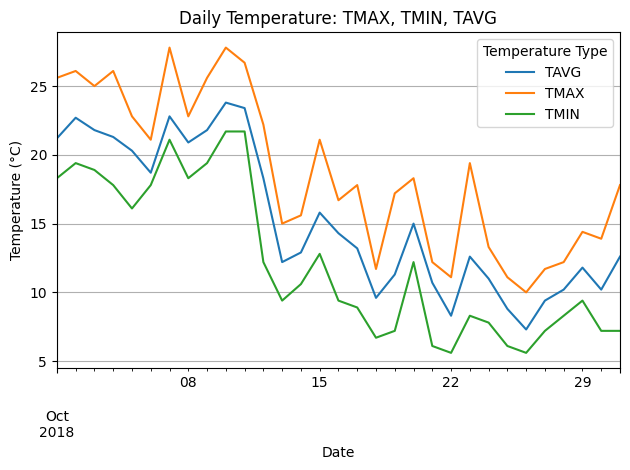

In [83]:
# Pivot the data
df_plot = df.pivot_table(index='date', columns='datatype', values='temp_C')

# Plot the data
plt.figure(figsize=(10, 6))
df_plot.plot(kind='line')

# Step 4: Customize the plot
plt.title('Daily Temperature: TMAX, TMIN, TAVG')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='Temperature Type')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()